In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 21)

import utils.nervousness_comparator as nerv_comparator

import utils.plotter_proof as proof
import utils.calc as calc

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_schedule_filename(prefix: str = "", day: int = 0, data_txt: str = "schedule", suffix: str = "") -> str:
    file_template = "data/{prefix}_{data}_{day:02d}{suffix}.csv"
    if suffix:
        suffix = f"_{suffix}"
    return file_template.format(prefix=prefix,data=data_txt,day=day, suffix=suffix)

In [4]:
file_template = "data/{prefix}_{text}.csv"

In [5]:
day_numb = 1
file = file_template.format(prefix="05", text = f"plan_{day_numb:02d}_init")

df_plan_init =  pd.read_csv(file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_000,0,M0,0,2015,1440,29,1469,-546,0,546
1,Job_000,1,M1,0,2015,1486,78,1564,-451,0,451
2,Job_000,2,M2,0,2015,1628,9,1637,-378,0,378
3,Job_000,3,M3,0,2015,1637,36,1673,-342,0,342
4,Job_000,4,M4,0,2015,1703,49,1752,-263,0,263
...,...,...,...,...,...,...,...,...,...,...,...
185,Job_018,5,M9,1398,3839,3006,76,3082,-757,0,757
186,Job_018,6,M5,1398,3839,3082,47,3129,-710,0,710
187,Job_018,7,M3,1398,3839,3129,52,3181,-658,0,658
188,Job_018,8,M4,1398,3839,3181,90,3271,-568,0,568


In [6]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,M9,0,2015,1994,21,2015,0,0,0
19,Job_001,9,M8,86,2438,2408,30,2438,0,0,0
29,Job_002,9,M4,149,2672,2639,33,2672,0,0,0
39,Job_003,9,M5,203,2981,2938,43,2981,0,0,0
49,Job_004,9,M6,241,2250,2197,53,2250,0,0,0


In [7]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(2, last_planning_start + 1):
        filename = file_template.format(prefix=schedule_prefix, text = f"schedule_{day_numb:02d}")
        df_plan_temp = pd.read_csv(filename)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [8]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [9]:
append_plans_and_last_ops("06_devpen", last_planning_start = 12,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [10]:
df_plan_devpen_last_ops_list[0]

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,M9,0,2015,1994,21,2015,0,0,0
19,Job_001,9,M8,86,2438,2408,30,2438,0,0,0
29,Job_002,9,M4,149,2672,2639,33,2672,0,0,0
39,Job_003,9,M5,203,2981,2938,43,2981,0,0,0
49,Job_004,9,M6,241,2250,2197,53,2250,0,0,0
59,Job_005,9,M7,312,2624,2599,25,2624,0,0,0
69,Job_006,9,M4,351,2429,2374,55,2429,0,0,0
79,Job_007,9,M3,504,2942,2863,79,2942,0,0,0
89,Job_008,9,M8,731,3339,3230,74,3304,-35,0,35
99,Job_009,9,M7,764,3205,3160,45,3205,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [11]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [12]:
append_plans_and_last_ops("06_simple", last_planning_start = 12,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [13]:
df_plan_simple_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_193,9,14603,17381,M5,17338,43,17381,0,0,0
3,Job_198,9,15131,17739,M8,17630,74,17704,-35,0,35
4,Job_199,9,15164,17605,M7,17560,45,17605,0,0,0
5,Job_200,9,15272,17710,M3,17631,79,17710,0,0,0
10,Job_201,9,15324,17931,M8,17857,74,17931,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
182,Job_223,9,17005,19782,M5,19739,43,19782,0,0,0
192,Job_224,9,17011,19021,M6,18968,53,19021,0,0,0
202,Job_225,9,17012,19535,M4,19502,33,19535,0,0,0
212,Job_226,9,17135,19150,M9,19129,21,19150,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

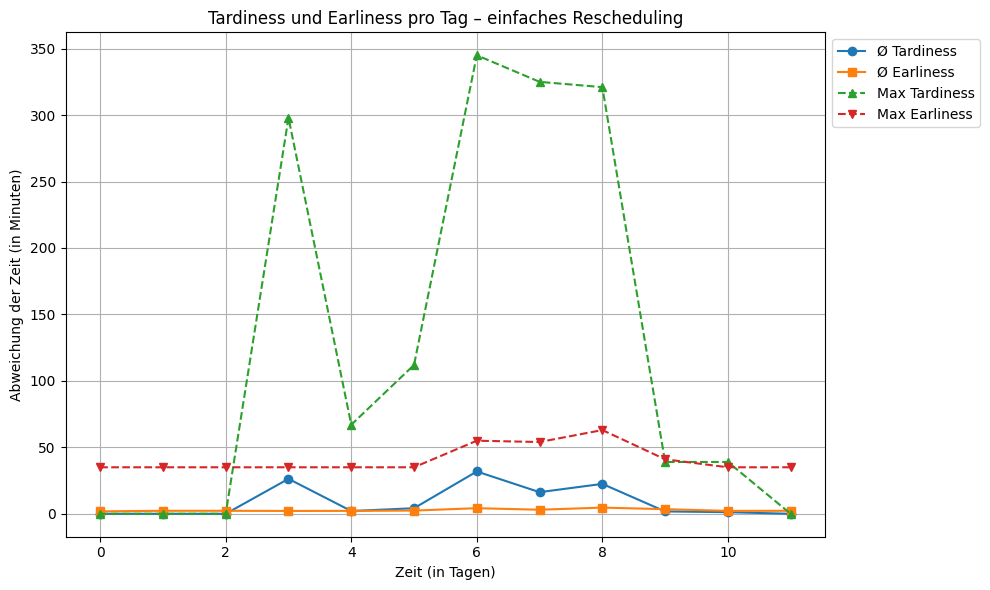

In [14]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


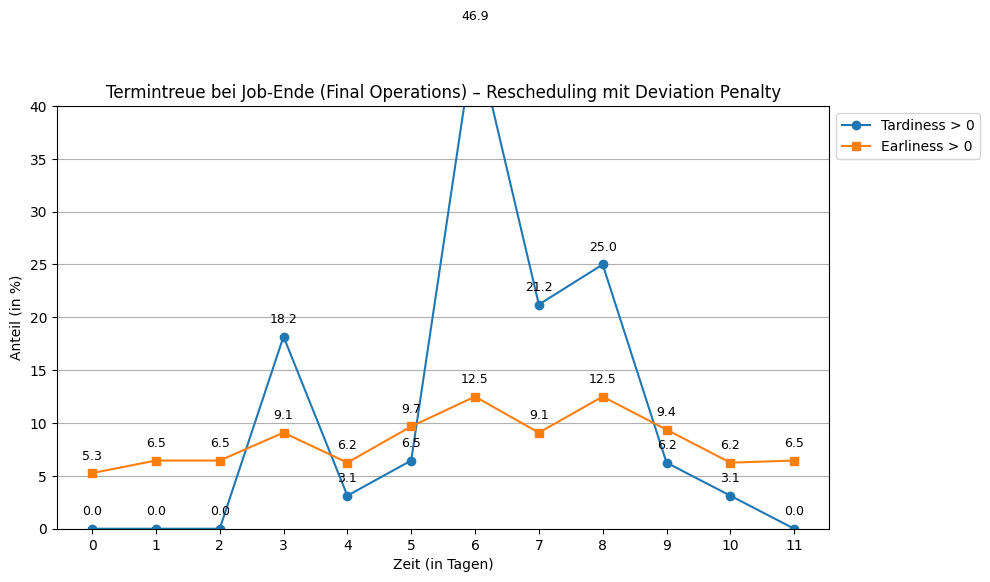

In [15]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)

### b) Mit Deviation Penalty

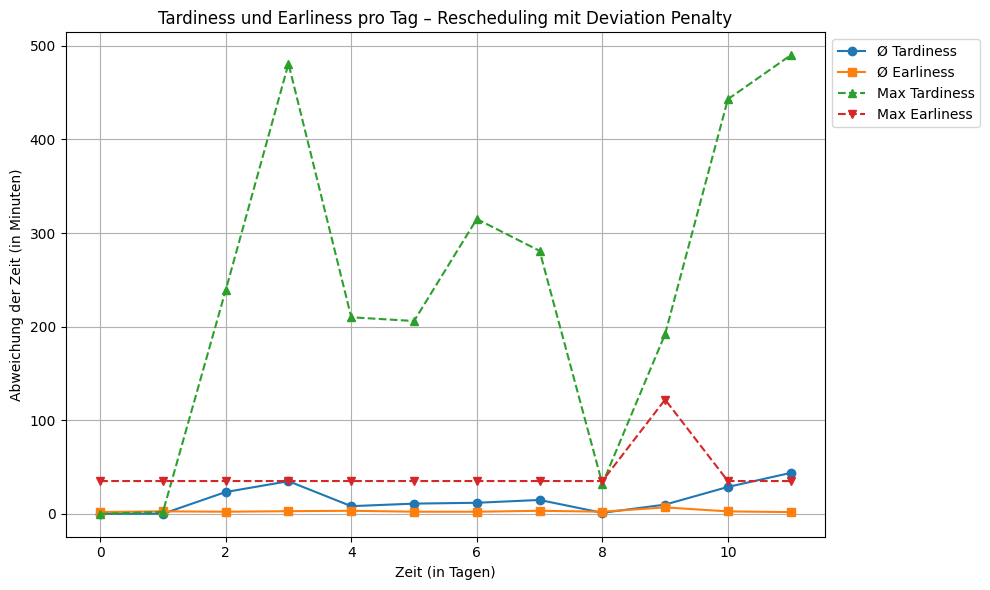

In [16]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


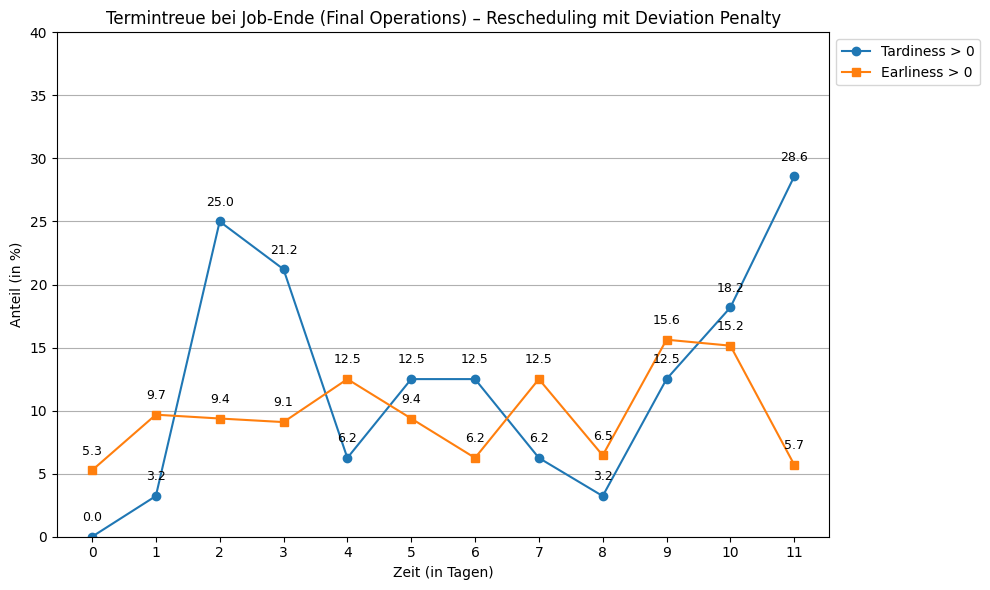

In [17]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

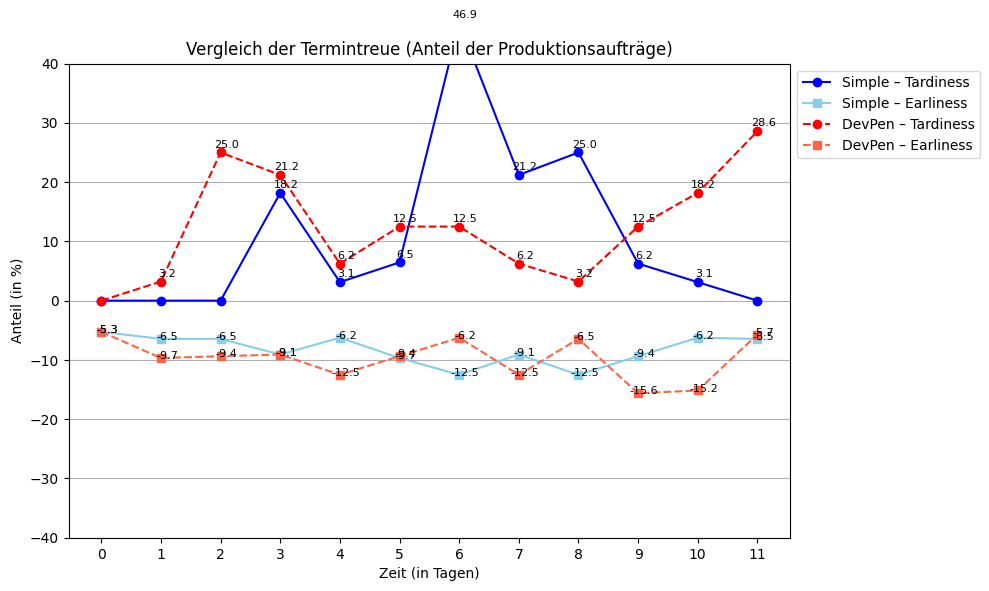

In [18]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-40,
    y_lim_max=40,
    as_percentage=True
)


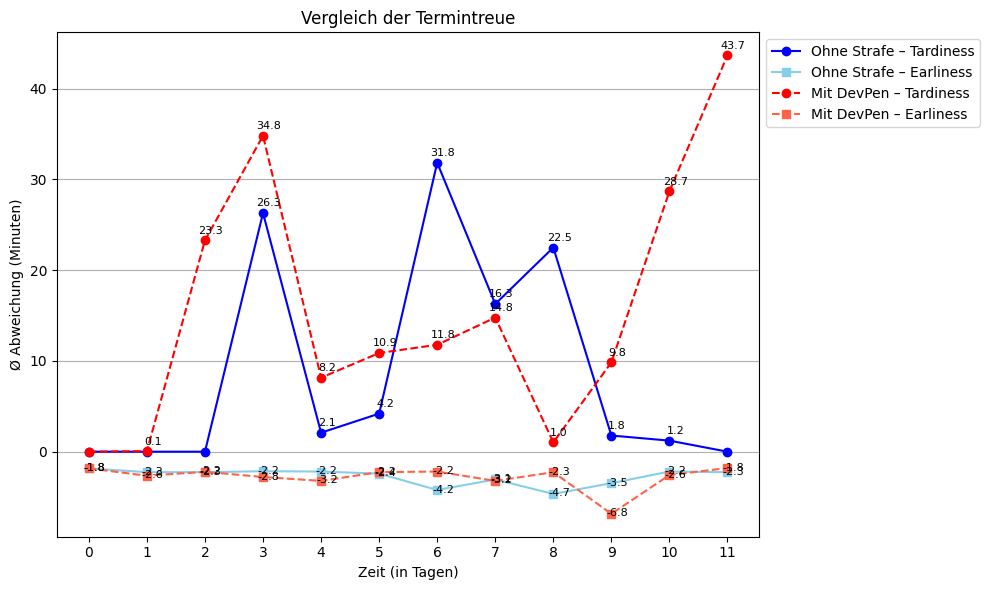

In [19]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

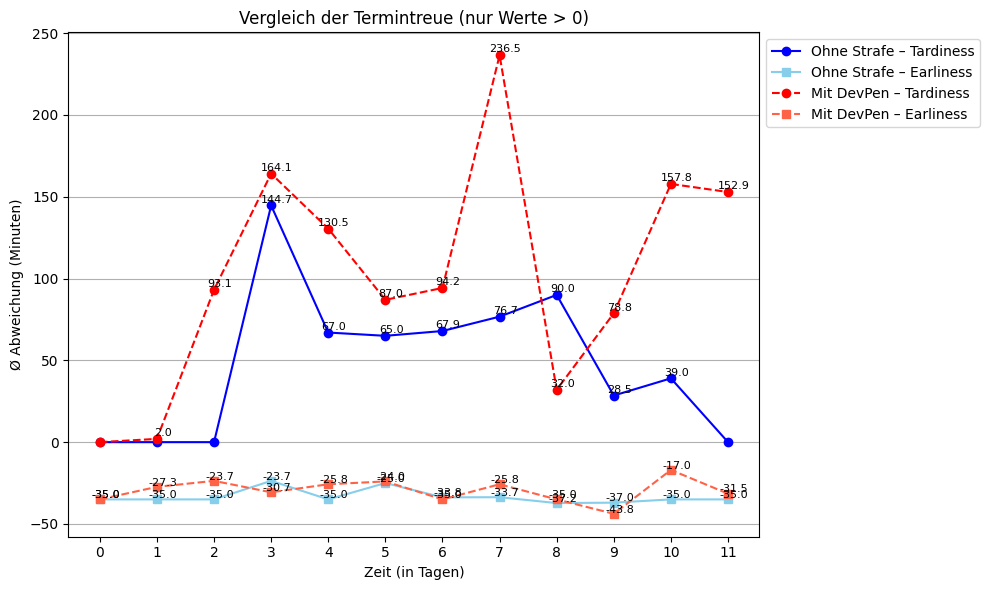

In [20]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

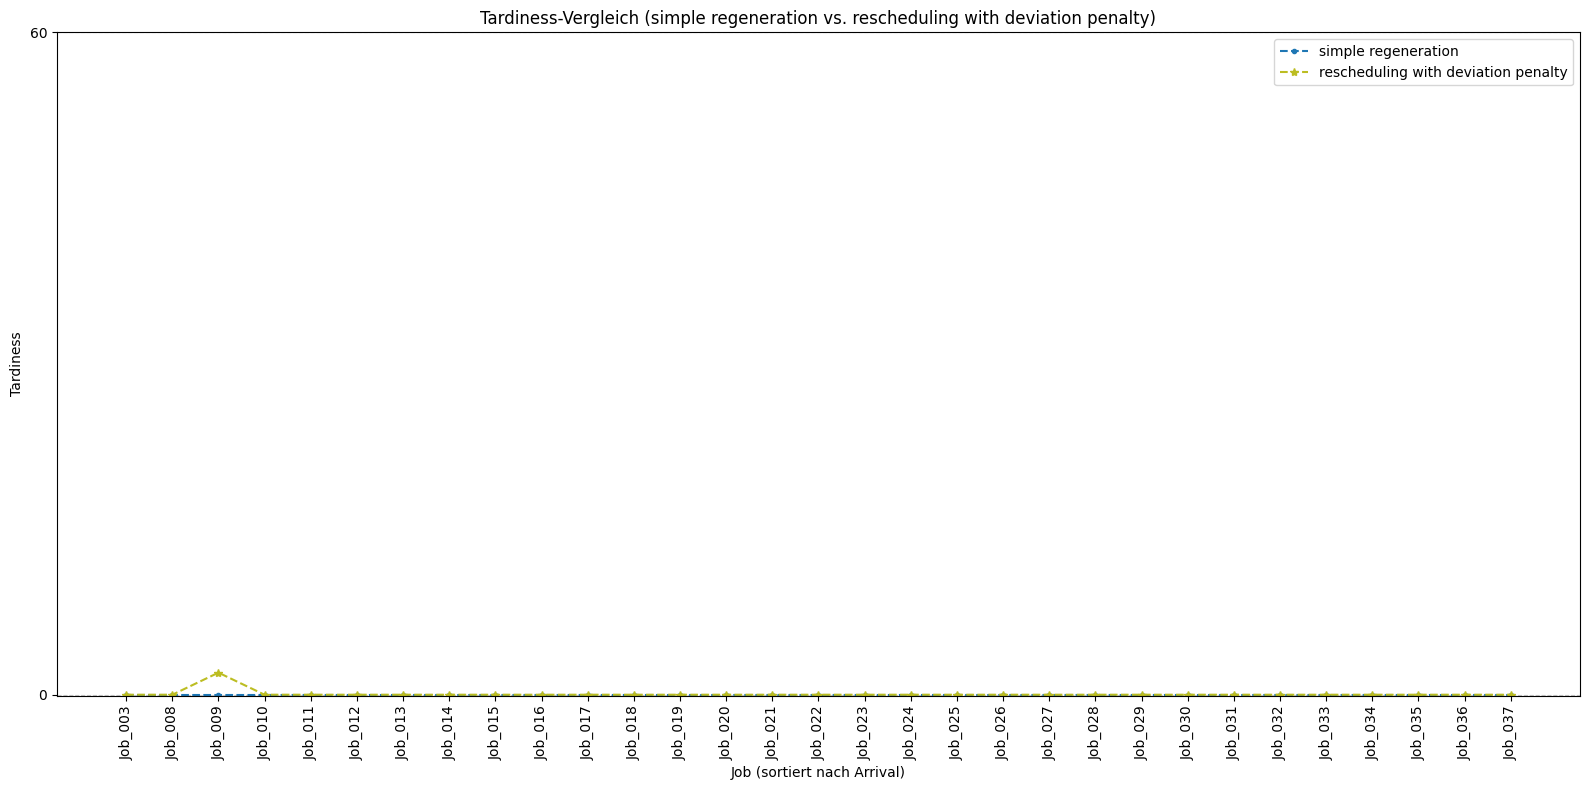

In [21]:
df_compare = proof.compare_and_plot_tardiness_single_day(
    df_plan_simple_last_ops_list[1],
    df_plan_devpen_last_ops_list[1],
    show_regression=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [22]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0,
 np.int64(1732),
 np.int64(2861),
 np.int64(5187),
 np.int64(4813),
 np.int64(7635),
 np.int64(6932),
 np.int64(4124),
 np.int64(5854),
 np.int64(2793),
 np.int64(3095),
 np.int64(2422)]

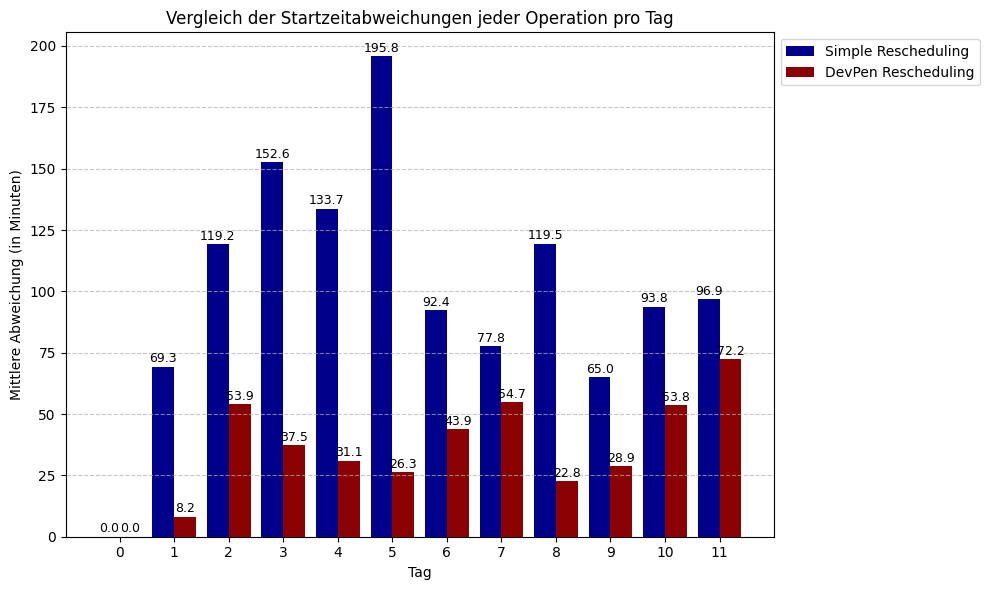

In [23]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [24]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

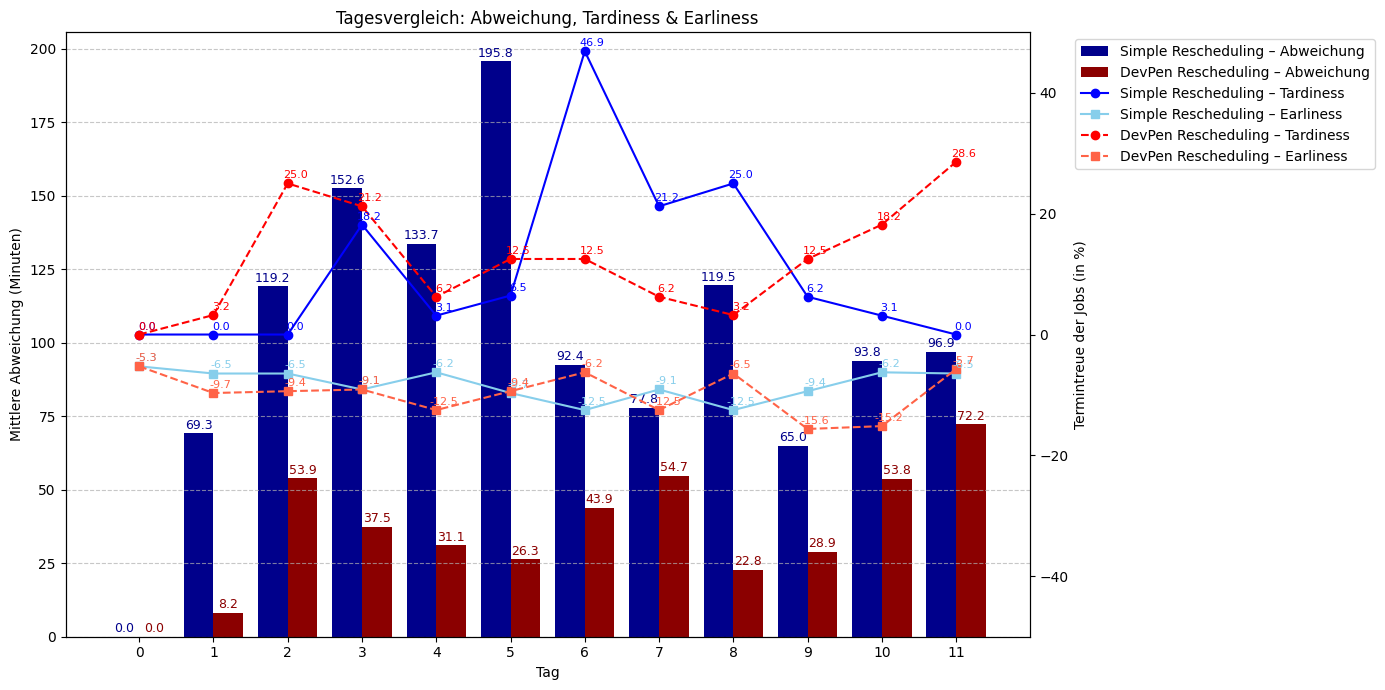

In [25]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=50
)


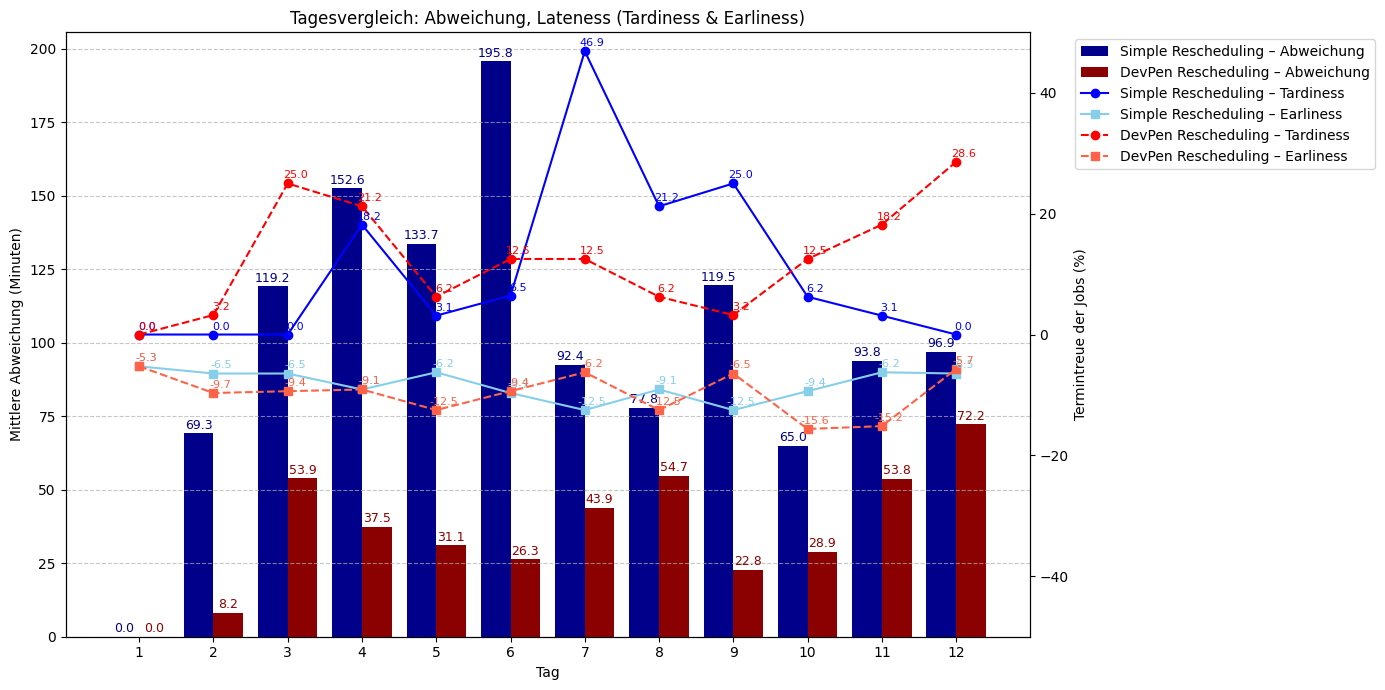

In [26]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs",
    y_right_lim_min = -50,
    y_right_lim_max = 50,
    as_percentage=True  # zeigt Tardiness/Earliness in Prozent
)


In [27]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

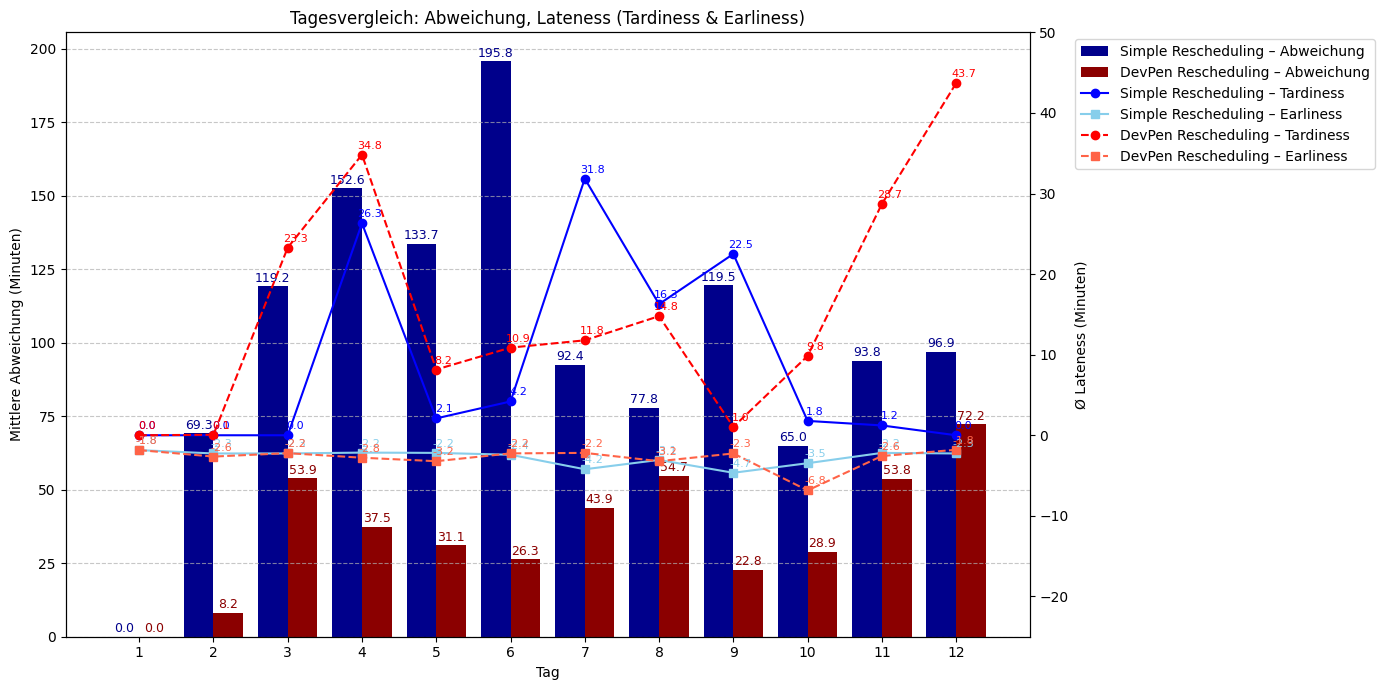

In [29]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -25,
    y_right_lim_max=50,
    as_percentage=False
)